In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

c:\Users\Alank\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [34]:
#classes = np.unique(y_train)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print("Number of classes:",len(classes))
print("The classes are:")
for i in classes:
    print(i,end=" ")

Number of classes: 10
The classes are:
airplane automobile bird cat deer dog frog horse ship truck 

In [35]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [28]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

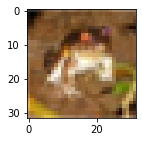

In [29]:
 plot_sample(X_train,y_train,0)

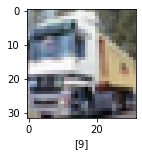

In [8]:
plot_sample(X_train,y_train,1)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
#building an active neural network
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1024/1563 [==================>...........] - ETA: 2s - loss: 1.9416 - accuracy: 0.2983

KeyboardInterrupt: 

In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 0s 781us/step - loss: 1.5061 - accuracy: 0.4646


[1.5061111450195312, 0.46459999680519104]

In [ ]:
#Using CNN to improve the performance of the model

In [14]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(input_shape=(32,32,3),filters=32,activation='relu',kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5267 - accuracy: 0.8153
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4685 - accuracy: 0.8338
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4157 - accuracy: 0.8529
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.3663 - accuracy: 0.8723
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.3232 - accuracy: 0.8861
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2872 - accuracy: 0.8980
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2518 - accuracy: 0.9113
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2280 - accuracy: 0.9192
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2007 - accuracy: 0.9281
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7912 - accuracy: 0.6683


[1.7912081480026245, 0.6682999730110168]

In [45]:
y_test = y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

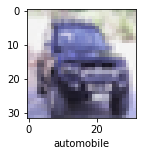

In [50]:
plot_sample(X_test,y_test,9)

In [43]:
y_pred = cnn.predict(X_test)
y_pred[:10]

313/313 [==============================] - 1s 4ms/step


array([[3.1855172e-05, 1.0703130e-08, 3.2315729e-04, 9.9640369e-01,
        5.2713841e-07, 1.9507025e-03, 8.2066887e-05, 1.7113720e-04,
        1.0368263e-03, 5.9860199e-08],
       [5.6543149e-06, 4.0271009e-09, 1.2924073e-14, 2.5436437e-19,
        1.0654415e-18, 3.6283286e-20, 4.3324001e-19, 5.0738852e-20,
        9.9999440e-01, 1.1150207e-12],
       [8.0481850e-02, 1.6716257e-03, 3.0695832e-05, 2.2969328e-04,
        3.3505473e-06, 1.4342255e-05, 7.4937248e-06, 2.4906328e-04,
        9.1221768e-01, 5.0941459e-03],
       [9.9989462e-01, 3.4040565e-07, 6.2552586e-05, 4.2360488e-09,
        1.4078211e-10, 3.1572312e-12, 1.3491617e-12, 2.9038898e-11,
        4.2438009e-05, 6.3428721e-11],
       [1.2815602e-11, 8.5721460e-08, 6.7361881e-04, 1.3481096e-02,
        3.5667415e-03, 5.1413431e-06, 9.8227262e-01, 1.4501137e-11,
        7.1654487e-09, 6.6079303e-07],
       [1.4043866e-10, 8.7697771e-10, 1.3289000e-04, 5.3607128e-03,
        6.8000062e-08, 1.0915769e-02, 9.8359019e-01, 1.66

In [44]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 9]

In [51]:
classes[y_classes[9]]

'truck'